In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [28]:
pd.read_csv("./SMSSpamCollection.txt", sep="\t", header=None).to_csv("sms_spam_collection.csv", index=False, header=["label", "message"])

In [29]:
data = pd.read_csv("sms_spam_collection.csv")
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [30]:
X = data.drop("label", axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(4457, 1)

(1115, 1)

(4457,)

(1115,)

In [31]:
#Display message counts
hams = data[(data['label'] == 'ham')]
spams = data[(data['label'] == 'spam')]
hams_count = hams.value_counts().sum()
spams_count = spams.value_counts().sum()
total_messages = hams_count + spams_count
spam_fraction = spams_count / total_messages

print("Number of ham messages: ", hams_count)
print("Number of spam messages: ", spams_count)
print("Fraction of spam messages: {:.2f}%".format(spam_fraction * 100))



Number of ham messages:  4825
Number of spam messages:  747
Fraction of spam messages: 13.41%


<ol>
<li>Describe a trivial classifier that could achieve at least an accuracy of 0.8.</li></br>
<p style="color:blue">An example of a trivial classifier that could achieve a least an accuracy of 0.8 is the DummyClassifier class that is in SKLearn.</p></br>
<li>How would this classifier make its classification?</li></br>
<p style="color:blue">This classfier would make its predictions based on the class that appeared the most. In this case, it would predict 'ham' for all values.</p></br>
<li>What accuracy would it get on your training data?</li></br>
<p style="color:blue">The accuracy of that model on the training data would be over 80%.</p></br>
<li>In addition to accuracy, what metric should you use to ensure that your classifier is better than a trivial one?</li></br>
<p style="color:blue">Another metric besides accuracy that I can use to ensure that my classifier works better than a trivial one is recall and precision metrics. </p></br>
<li>What score would your trivial classifier get on this training data?</li></br>
<p style="color:blue">The score this model would receive for the recall score for 'ham' messages would be 1 and the recall score for 'spam' would be 0. The precision score for the 'ham' messages would be 0.8659 and the precision score for the 'spam' messages would be 0.</p></br>
</ol>

# Bayesian Model

In [ ]:
nlp = spacy.load("en_core_web_sm")
def custom_spacy_tokenizer(text):
        doc = nlp(text)
        return [token.lemma_.lower().strip() for token in doc if not token.is_stop and not token.is_punct]

In [ ]:
vectorizer = CountVectorizer(tokenizer=custom_spacy_tokenizer, strip_accents='unicode', lowercase=True)
X_train_vectorized = vectorizer.fit_transform(X_train['message'])
vectorizer.get_feature_names_out()
X_test_vectorized = vectorizer.transform(X_test['message'])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
display(X_train_vectorized.shape)
display(X_test_vectorized.shape)
display(y_train.shape)
display(y_test.shape)

(4457, 7158)

(1115, 7158)

(4457,)

(1115,)

In [36]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [37]:
print("Training accuracy: ", classifier.score(X_train_vectorized, y_train))
print("Test accuracy: ", classifier.score(X_test_vectorized, y_test))

Training accuracy:  0.9925959165357864
Test accuracy:  0.9865470852017937


# Bayesian Training Results

Training Cross Validation Metrics

In [78]:
metrics = ['accuracy', 'precision', 'recall']

In [79]:
for metric in metrics:
    bayesian_training_values = cross_val_score(classifier, X_train_vectorized, y_train, scoring=metric, cv=5)
    print(f"Cross-validation {metric} scores: ", bayesian_training_values)
    np_bayesian_training_values = np.array(bayesian_training_values)
    average = np.mean(np_bayesian_training_values)
    stDev = np.std(np_bayesian_training_values)
    print(average.round(2), " +/- ", stDev.round(4))
# bayesian_training_values = cross_val_score(classifier, X_train_vectorized, y_train, scoring='accuracy', cv=5)
# print("Cross-validation scores: ", bayesian_training_values)

Cross-validation accuracy scores:  [0.97757848 0.96973094 0.98204265 0.97530864 0.98316498]
0.98  +/-  0.0049
Cross-validation precision scores:  [nan nan nan nan nan]
nan  +/-  nan
Cross-validation recall scores:  [nan nan nan nan nan]
nan  +/-  nan


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response_method, **kwargs
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/opt/anaco

In [ ]:
# np_bayesian_training_values = np.array(bayesian_training_values)
# average = np.mean(np_bayesian_training_values)
# stDev = np.std(np_bayesian_training_values)
# print(average.round(2), " +/- ", stDev.round(4))

0.98  +/-  0.0049


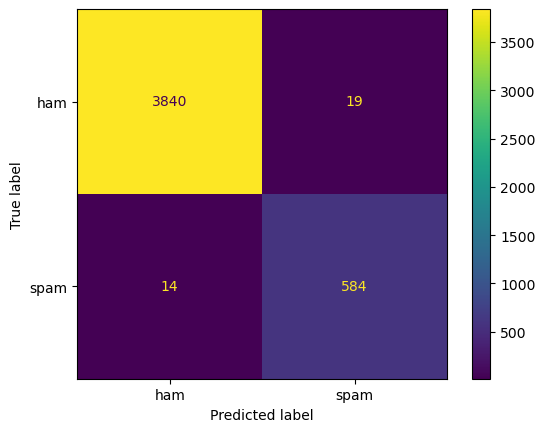

In [40]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(classifier, X_train_vectorized, y_train)

In [ ]:
y_train_pred = classifier.predict(X_train_vectorized)
ham_train_recall_score = recall_score(y_train, y_train_pred, pos_label='ham')
spam_train_recall_score = recall_score(y_train, y_train_pred, pos_label='spam')
ham_train_precision_score = precision_score(y_train, y_train_pred, pos_label='ham')
spam_train_precision_score = precision_score(y_train, y_train_pred, pos_label='spam')

print("Ham Recall Score: ", ham_train_recall_score)
print("Spam Recall Score: ", spam_train_recall_score)
print("Ham Precision Score: ", ham_train_precision_score)
print("Spam Precision Score: ", spam_train_precision_score)

Ham Recall Score:  0.9950764446747862
Spam Recall Score:  0.9765886287625418
Ham Precision Score:  0.9963674104826155
Spam Precision Score:  0.9684908789386402


# Bayesian Testing Results

In [41]:
bayesian_testing_values = cross_val_score(classifier, X_test_vectorized, y_test, cv=5)
print("Cross-validation scores: ", bayesian_testing_values)

Cross-validation scores:  [0.97757848 0.97757848 0.97757848 0.98654709 0.98654709]


In [42]:
np_bayesian_testing_values = np.array(bayesian_testing_values)
average = np.mean(np_bayesian_testing_values)
stDev = np.std(np_bayesian_testing_values)
print(average.round(2), " +/- ", stDev.round(4))

0.98  +/-  0.0044


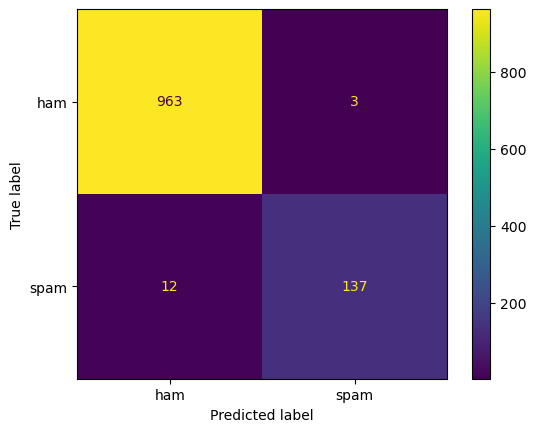

In [43]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(classifier, X_test_vectorized, y_test)

In [76]:
y_test_pred = classifier.predict(X_test_vectorized)
ham_test_recall_score = recall_score(y_test, y_test_pred, pos_label='ham')
spam_test_recall_score = recall_score(y_test, y_test_pred, pos_label='spam')
ham_test_precision_score = precision_score(y_test, y_test_pred, pos_label='ham')
spam_test_precision_score = precision_score(y_test, y_test_pred, pos_label='spam')

print("Ham Recall Score: ", ham_test_recall_score)
print("Spam Recall Score: ", spam_test_recall_score)
print("Ham Precision Score: ", ham_test_precision_score)
print("Spam Precision Score: ", spam_test_precision_score)

Ham Recall Score:  0.9968944099378882
Spam Recall Score:  0.9194630872483222
Ham Precision Score:  0.9876923076923076
Spam Precision Score:  0.9785714285714285


# Answer these questions***

<ol>
<li>Did your classifier perform better than one that always predicted "ham"?</li></br>
<li>Were your testing metrics within the "bounds" set by your train/validation split (mean +/- std dev)?</li></br>
<li>Would you use this "bare" classifier as a filter on your own messages?</li></br>
</ol>

# Bayesian Training Learning Curve

In [44]:
bayesian_train_sizes, bayesian_train_scores, bayesian_test_scores = learning_curve(
    classifier,
    X_train_vectorized,
    y_train,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available CPU cores
)

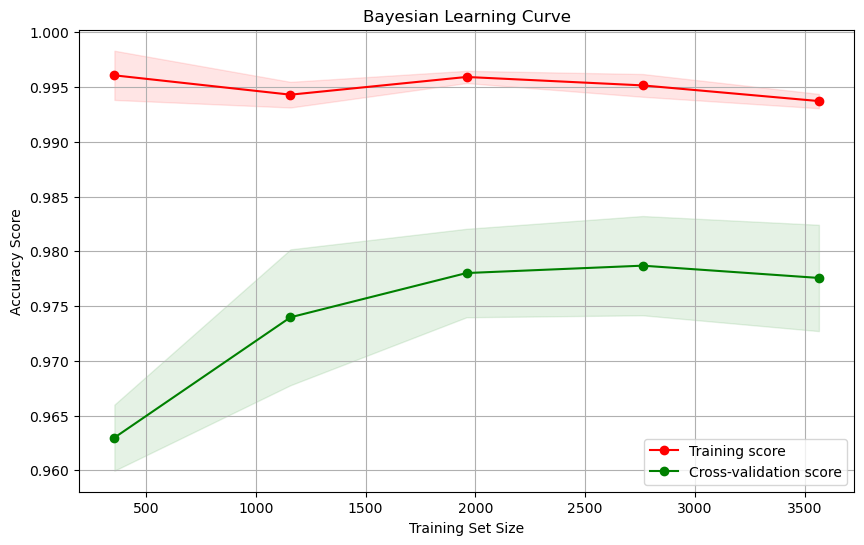

In [45]:
# Calculate mean and standard deviation for scores
bayesian_train_scores_mean = np.mean(bayesian_train_scores, axis=1)
bayesian_train_scores_std = np.std(bayesian_train_scores, axis=1)
bayesian_test_scores_mean = np.mean(bayesian_test_scores, axis=1)
bayesian_test_scores_std = np.std(bayesian_test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Bayesian Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(bayesian_train_sizes, bayesian_train_scores_mean - bayesian_train_scores_std,
                 bayesian_train_scores_mean + bayesian_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(bayesian_train_sizes, bayesian_test_scores_mean - bayesian_test_scores_std,
                 bayesian_test_scores_mean + bayesian_test_scores_std, alpha=0.1,
                 color="g")
plt.plot(bayesian_train_sizes, bayesian_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(bayesian_train_sizes, bayesian_test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

<p>
What this learning curve is telling you about how your algorithm might perform if given more data.  That is, does it appear to still be learning even as you get to larger input sizes?  Phrased another way, if you built an App to classify spam SMS messages, would that App be able to learn/improve from your user's classification of messages?
</p>

# TFIDF Vectorization and Logistic Classifier

In [46]:
X_train.shape

(4457, 1)

In [47]:
tdidf_vectorizer = TfidfVectorizer(tokenizer=custom_spacy_tokenizer)
X_train_tfidf_vectorized = tdidf_vectorizer.fit_transform(X_train['message'])
tdidf_vectorizer.get_feature_names_out()
X_test_tfidf_vectorized = tdidf_vectorizer.transform(X_test['message'])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [48]:
y_train = np.array(y_train)
display(y_train)

display(X_train)

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

,message
1978,Reply to win £100 weekly! Where will the 2006 ...
3989,Hello. Sort of out in town already. That . So ...
3935,How come guoyang go n tell her? Then u told her?
4078,Hey sathya till now we dint meet not even a si...
4086,Orange brings you ringtones from all time Char...
...,...
3772,"Hi, wlcome back, did wonder if you got eaten b..."
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [49]:
pipeline = Pipeline(
    [
        ("clf", LogisticRegression())
    ]
)
param_grid = {
    "clf__penalty": ['l1', 'l2'], 
    "clf__C": [450, 475, 500, 515, 530], 
}

model = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=-1)
model.fit(X_train_tfidf_vectorized, y_train)
logistic_pred_train = model.predict(X_train_tfidf_vectorized)
logistic_pred_test = model.predict(X_test_tfidf_vectorized)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator

In [50]:
model.best_params_

{'clf__C': 515, 'clf__penalty': 'l2'}

# TFIDF Vectorization and Logistic Classifier Training Results

In [54]:
logistic_training_values = cross_val_score(model, X_train_tfidf_vectorized, y_train, cv=5)
print("Cross-validation scores: ", logistic_training_values)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator

Cross-validation scores:  [0.98654709 0.98430493 0.97867565 0.97194164 0.97979798]


In [55]:
np_logistic_training_values = np.array(logistic_training_values)
average = np.mean(np_logistic_training_values)
stDev = np.std(np_logistic_training_values)
print(average.round(2), " +/- ", stDev.round(4))

0.98  +/-  0.0051


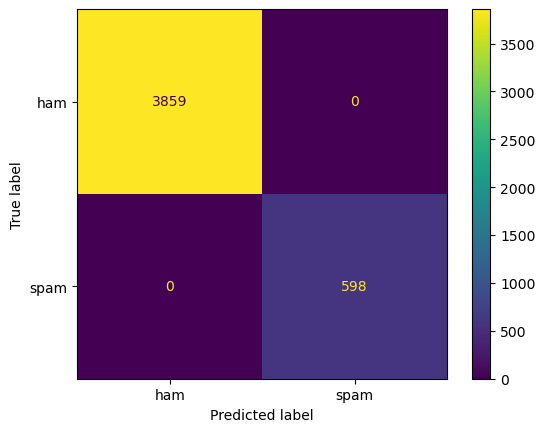

In [56]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_train_tfidf_vectorized, y_train)

# TFIDF Vectorization and Logistic Classifier Testing Results

In [57]:
logistic_testing_values = cross_val_score(model, X_test_tfidf_vectorized, y_test, cv=5)
print("Cross-validation scores: ", logistic_testing_values)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator

Cross-validation scores:  [0.95515695 0.96860987 0.98206278 0.97757848 0.96412556]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator

In [58]:
np_logistic_testing_values = np.array(logistic_testing_values)
average = np.mean(np_logistic_testing_values)
stDev = np.std(np_logistic_testing_values)
print(average.round(2), " +/- ", stDev.round(4))

0.97  +/-  0.0096


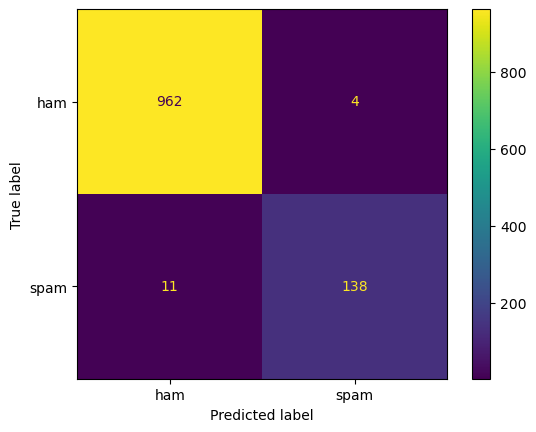

In [59]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf_vectorized, y_test)

# TFIDF Vectorization and Logistic Classifier Training Learning Curve

In [61]:
logistic_train_sizes, logistic_train_scores, logistic_test_scores = learning_curve(
    model,
    X_train_tfidf_vectorized,
    y_train,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',  # Metric to evaluate the model
    n_jobs=-1,  # Use all available CPU cores
)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator

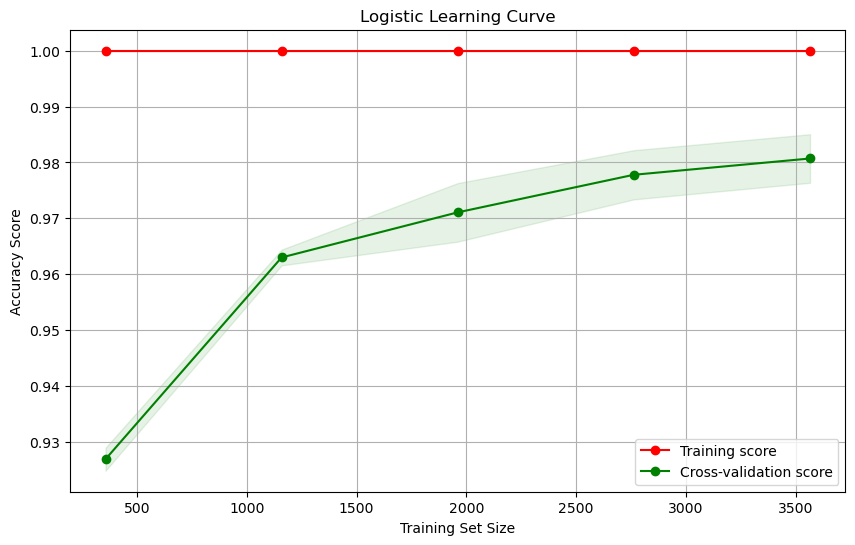

Exception ignored in: <function ResourceTracker.__del__ at 0x1026bdbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107921bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102eb5bc0>
Traceback (most recent call last

In [62]:
# Calculate mean and standard deviation for scores
logistic_train_scores_mean = np.mean(logistic_train_scores, axis=1)
logistic_train_scores_std = np.std(logistic_train_scores, axis=1)
logistic_test_scores_mean = np.mean(logistic_test_scores, axis=1)
logistic_test_scores_std = np.std(logistic_test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Logistic Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(logistic_train_sizes, logistic_train_scores_mean - logistic_train_scores_std,
                 logistic_train_scores_mean + logistic_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(logistic_train_sizes, logistic_test_scores_mean - logistic_test_scores_std,
                 logistic_test_scores_mean + logistic_test_scores_std, alpha=0.1,
                 color="g")
plt.plot(logistic_train_sizes, logistic_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(logistic_train_sizes, logistic_test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Conclusions

Bayesian vs Logistic Results